# Fine Tuning Transfer Learning

In [28]:
import zipfile
import urllib.request
import random
import os
import pathlib
import datetime
import numpy as np
import pandas as pd

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

import matplotlib.pylab as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import preprocessing

import tensorflow_hub as hub

In [ ]:
walk_through_dir("./data/10_food_classes_10_percent/")

In [7]:
train_dir = "./data/10_food_classes_10_percent/train/"
test_dir = "./data/10_food_classes_10_percent/test/"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(x.shape)

x = tf.keras.layers.GlobalAveragePooling2D(
    name="global_average_pooling_layer")(x)
print(x.shape)

outputs = tf.keras.layers.Dense(10, activation="softmax",
                                name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent_model_0 = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=int(0.25 * len(test_data_10_percent)),
    callbacks=[
        create_tensorboard_callback(
            dir_name="transfer_learning",
            experiment_name="10_percent_feature_extraction")
    ])


(None, 7, 7, 1280)
(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230217-185312
Epoch 1/5
24/24 [==============================] - 66s 2s/step - loss: 1.9088 - accuracy: 0.3733 - val_loss: 1.3446 - val_accuracy: 0.7467
Epoch 2/5
24/24 [==============================] - 60s 3s/step - loss: 1.1111 - accuracy: 0.7613 - val_loss: 0.9180 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 57s 2s/step - loss: 0.7880 - accuracy: 0.8347 - val_loss: 0.7494 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 84s 4s/step - loss: 0.6504 - accuracy: 0.8413 - val_loss: 0.6522 - val_accuracy: 0.8405
Epoch 5/5
24/24 [==============================] - 67s 3s/step - loss: 0.5464 - accuracy: 0.8800 - val_loss: 0.6014 - val_accuracy: 0.8470


In [31]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

In [14]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

In [15]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


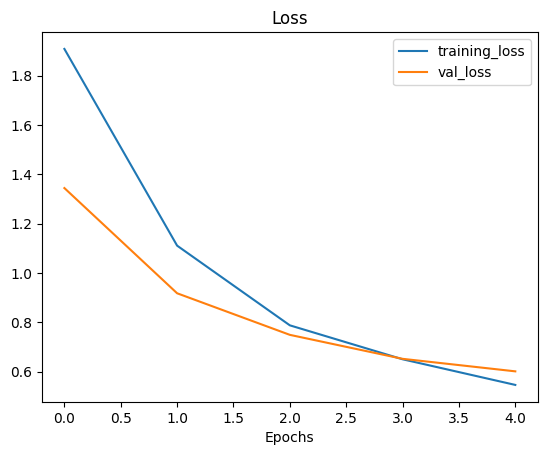

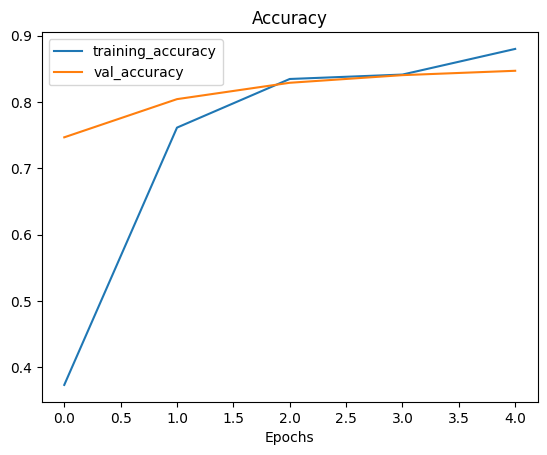

In [16]:
plot_loss_curves(history_10_percent_model_0)

## Getting Feature Vector from Trained Model

In [19]:
# this is an example of how GlobalAveragePooling does

input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)


## model_1 training on 1% data

In [20]:
# downloading dataset

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"
filename = "10_food_classes_1_percent.zip"
file = urllib.request.urlretrieve(url, filename)


In [21]:
# unziping dataset

with zipfile.ZipFile("./data/10_food_classes_1_percent.zip") as zip_ref:
    zip_ref.extractall()

In [24]:
train_dir_1_percent = "./data/10_food_classes_1_percent/train"
test_dir_1_percent = "./data/10_food_classes_1_percent/test"

walk_through_dir("./data/10_food_classes_1_percent/")

There are 2 directories and 0 images in './data/10_food_classes_1_percent/'.
There are 10 directories and 0 images in './data/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in './data/10_food_classes_1_percent/test/ramen'.
There a

In [25]:
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_1_percent,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [34]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
],name="data_augmentation")


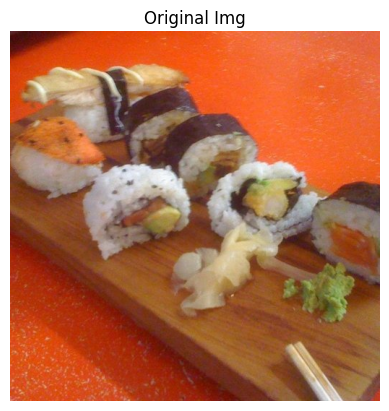

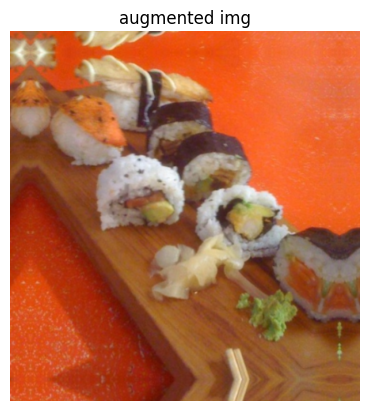

In [44]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "./data/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/"+ random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title("Original Img")
plt.axis(False)

augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title("augmented img")
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

## Building model_1

In [48]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# data aug
x = data_augmentation(inputs)

x = base_model(x, training=False)

# pool output
x = layers.GlobalAveragePooling2D(name="global_pooling")(x)

# dense layer as output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# make model
model_1 = keras.Model(inputs, outputs)

# compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data_1_percent,
                                validation_steps=int(0.25 * len(test_data_1_percent)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230219-133347
Epoch 1/5
3/3 [==============================] - 38s 13s/step - loss: 2.3490 - accuracy: 0.0857 - val_loss: 2.1917 - val_accuracy: 0.2138
Epoch 2/5
3/3 [==============================] - 27s 13s/step - loss: 2.0811 - accuracy: 0.3143 - val_loss: 2.0782 - val_accuracy: 0.2928
Epoch 3/5
3/3 [==============================] - 27s 13s/step - loss: 1.8984 - accuracy: 0.2857 - val_loss: 1.9835 - val_accuracy: 0.3421
Epoch 4/5
3/3 [==============================] - 27s 13s/step - loss: 1.7070 - accuracy: 0.5857 - val_loss: 1.8634 - val_accuracy: 0.4342
Epoch 5/5
3/3 [==============================] - 34s 17s/step - loss: 1.5256 - accuracy: 0.7571 - val_loss: 1.7772 - val_accuracy: 0.4671


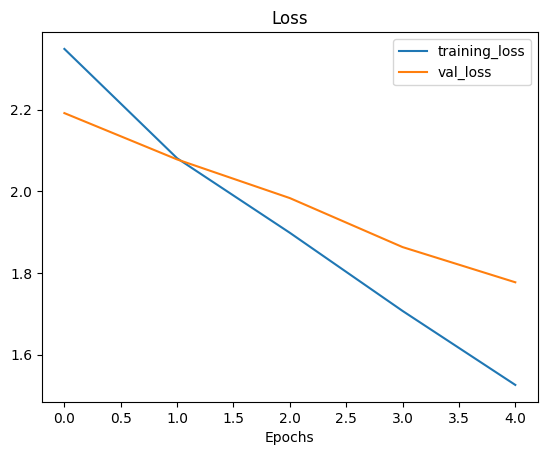

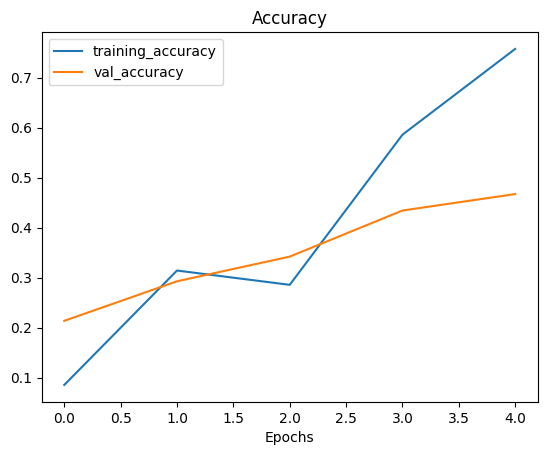

In [49]:
plot_loss_curves(history_1_percent)

## Model_2 10% data with augmentation

In [50]:
train_dir = "./data/10_food_classes_10_percent/train/"
test_dir = "./data/10_food_classes_10_percent/test/"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [55]:
inputs = layers.Input(shape=input_shape,name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2d")(x)
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2 = tf.keras.Model(inputs,outputs)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


## creating model checkpoint

In [56]:
checkpoint_path = "./checkpoints/10_percent/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq="epoch",
    verbose=1)

initial_epochs = 5
history_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    validation_data=test_data_10_percent,
    validation_steps=int(0.25 * len(test_data_10_percent)),
    callbacks=[
        create_tensorboard_callback(dir_name="transfer_learning",
                                    experiment_name="10_percent_data_aug"),
        checkpoint_callback
    ])


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230219-142708
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0094 - accuracy: 0.3360
Epoch 1: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 76s 3s/step - loss: 2.0094 - accuracy: 0.3360 - val_loss: 1.4356 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3136 - accuracy: 0.6813
Epoch 2: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 63s 3s/step - loss: 1.3136 - accuracy: 0.6813 - val_loss: 0.9762 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0075 - accuracy: 0.7667
Epoch 3: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 58s 2s/step - loss: 1.0075 - accuracy: 0.7667 - val_loss: 0.7489 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.7960
E

In [57]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 110s 1s/step - loss: 0.6213 - accuracy: 0.8416


[0.621265172958374, 0.8416000008583069]

In [58]:
model_2.load_weights(checkpoint_path)

## model_3 fine tuning

In [59]:
model_2.layers

In [64]:
# how many trainable variables are in our base model

len(model_2.layers[2].trainable_variables)

10

In [ ]:
# setting last 10 layers to trainable
base_model.trainable = True

for l in base_model.layers[:-10]:
    l.trainable = False
    
# every time u change base_model we have to recompile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])
# when fine-tuning u typically want to lower ur learning_rate by 10x(rule-of-thumb)

# u can see the above cell changed from 0 to 10


## fine tune for **another** 5 epochs

In [83]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data_10_percent,
    validation_steps=int(0.05 * len(test_data_10_percent)),
    initial_epoch=history_10_percent_data_aug.epoch[-1],
    callbacks=[
        create_tensorboard_callback(dir_name="transfer_learning",
                                    experiment_name="10_percent_fine_tune_data_aug_last_10"),
        checkpoint_callback
    ])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_data_aug_last_10/20230219-180454
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.5703 - accuracy: 0.8213
Epoch 5: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 45s 2s/step - loss: 0.5703 - accuracy: 0.8213 - val_loss: 0.5168 - val_accuracy: 0.7917
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.3383 - accuracy: 0.8733
Epoch 6: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 42s 2s/step - loss: 0.3383 - accuracy: 0.8733 - val_loss: 0.4168 - val_accuracy: 0.8646
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.2210 - accuracy: 0.9280
Epoch 7: saving model to ./checkpoints/10_percent/
24/24 [==============================] - 43s 2s/step - loss: 0.2210 - accuracy: 0.9280 - val_loss: 0.3572 - val_accuracy: 0.8750
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.126

In [69]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 114s 1s/step - loss: 0.4289 - accuracy: 0.8580


[0.428913414478302, 0.8579999804496765]

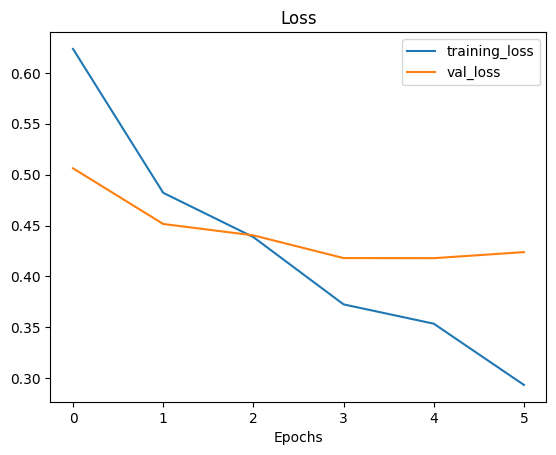

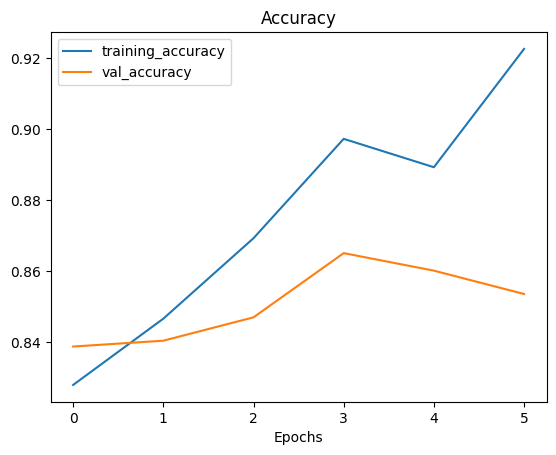

In [70]:
plot_loss_curves(history_fine_10_percent_data_aug)

## model_4 training on all data

In [72]:
# downloading dataset

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
filename = "10_food_classes_all_data.zip"
file = urllib.request.urlretrieve(url, filename)

In [73]:
# unziping dataset

with zipfile.ZipFile("./data/10_food_classes_all_data.zip") as zip_ref:
    zip_ref.extractall()

In [75]:
train_dir = "./data/10_food_classes_all_data/train/"
test_dir = "./data/10_food_classes_all_data/test/"
walk_through_dir("./data/10_food_classes_all_data/")

There are 2 directories and 0 images in './data/10_food_classes_all_data/'.
There are 10 directories and 0 images in './data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in './data/10_food_classes_all_data/test/ramen'.
There are 0 direct

In [80]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
)

test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [84]:
model_2.load_weights(checkpoint_path)

In [85]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 119s 1s/step - loss: 0.4486 - accuracy: 0.8652


[0.44858384132385254, 0.8651999831199646]

In [86]:
len(model_2.layers[2].trainable_variables)


10

In [87]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [88]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(
    train_data_10_classes_full,
    epochs=fine_tune_epochs,
    validation_data=test_data_10_classes_full,
    validation_steps=int(0.05 * len(test_data_10_classes_full)),
    initial_epoch=history_10_percent_data_aug.epoch[-1],
    callbacks=[
        create_tensorboard_callback(dir_name="transfer_learning",
                                    experiment_name="full_10_classes_fine_tune_last_10"),
    ])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230219-181915
Epoch 5/10
235/235 [==============================] - 402s 2s/step - loss: 0.5870 - accuracy: 0.8255 - val_loss: 0.3411 - val_accuracy: 0.8854
Epoch 6/10
235/235 [==============================] - 361s 2s/step - loss: 0.4657 - accuracy: 0.8511 - val_loss: 0.2877 - val_accuracy: 0.9375
Epoch 7/10
235/235 [==============================] - 348s 1s/step - loss: 0.4164 - accuracy: 0.8693 - val_loss: 0.3598 - val_accuracy: 0.9479
Epoch 8/10
235/235 [==============================] - 380s 2s/step - loss: 0.3679 - accuracy: 0.8805 - val_loss: 0.2869 - val_accuracy: 0.9167
Epoch 9/10
235/235 [==============================] - 387s 2s/step - loss: 0.3331 - accuracy: 0.8961 - val_loss: 0.2381 - val_accuracy: 0.9583
Epoch 10/10
235/235 [==============================] - 381s 2s/step - loss: 0.3089 - accuracy: 0.9037 - val_loss: 0.1214 - val_accuracy: 0.9583


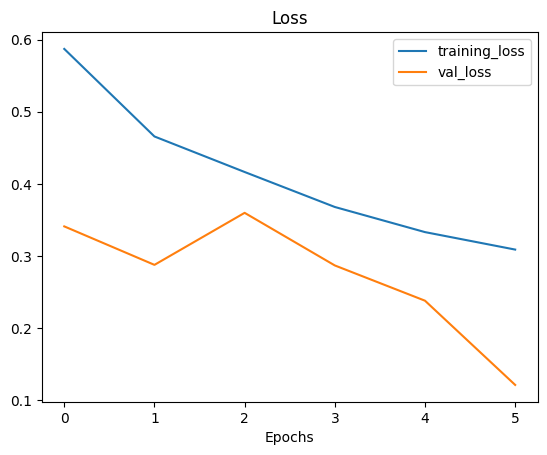

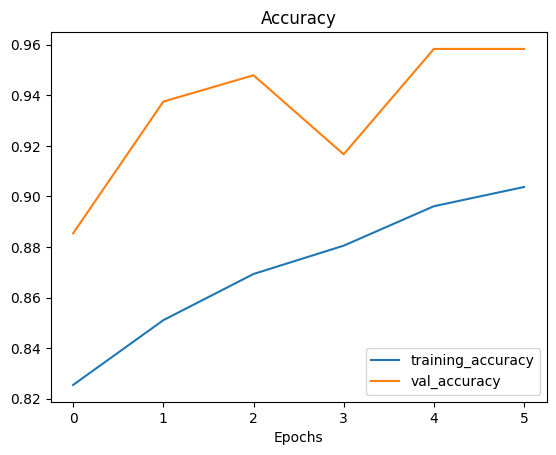

In [90]:
plot_loss_curves(history_fine_10_classes_full)